In [77]:
import re
import mne
import wfdb
import glob
import pathlib
import numpy as np

In [2]:
path = "/home/koliber/Documents/Workspace/ms-thesis-code/data/CHB_MIT/"

records = glob.glob(f"{path}/downloads/**/*.edf", recursive=True)
seizures = glob.glob(f"{path}/downloads/**/*.edf.seizures", recursive=True)

In [60]:
record = records[0]
raw = mne.io.read_raw_edf(record, exclude=["T8-P8"], infer_types=True)

if f"{record}.seizures" in seizures:
    seizure = wfdb.io.rdann(record, extension="seizures")
    start = seizure.sample[0] / raw.info["sfreq"]
    finish = seizure.sample[1] / raw.info["sfreq"]
    raw.set_annotations(mne.Annotations(onset=start, duration=(finish - start), description="seizure"))

Extracting EDF parameters from /home/koliber/Documents/Workspace/ms-thesis-code/data/CHB_MIT/downloads/chb01/chb01_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [61]:
builtin_montages = mne.channels.get_builtin_montages(descriptions=True)
for montage_name, montage_description in builtin_montages:
    print(f"{montage_name}: {montage_description}")

standard_1005: Electrodes are named and positioned according to the international 10-05 system (343+3 locations)
standard_1020: Electrodes are named and positioned according to the international 10-20 system (94+3 locations)
standard_alphabetic: Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)
standard_postfixed: Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)
standard_prefixed: Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)
standard_primed: Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)
biosemi16: BioSemi cap with 16 electrodes (16+3 locations)
biosemi32: BioSemi cap with 32 electrodes (32+3 locations)
biosemi64: BioSemi cap with 64 electrodes (64+3 locations)
biosemi128: BioSemi cap with 128 electrodes (1

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


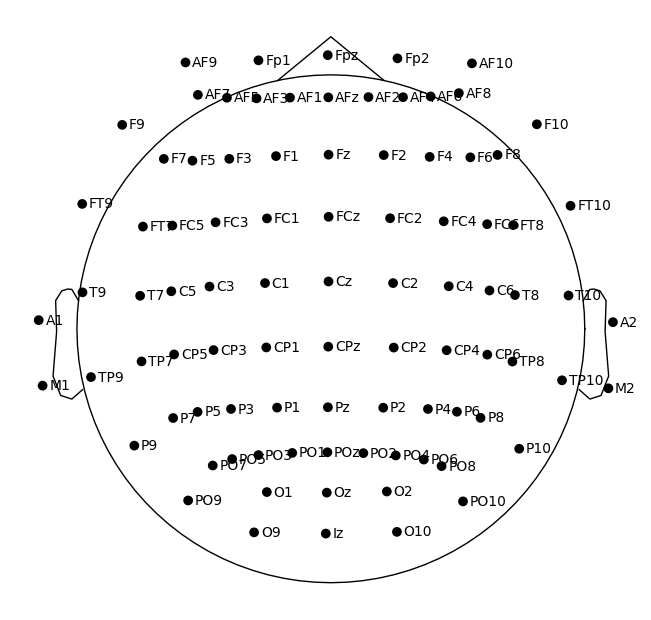

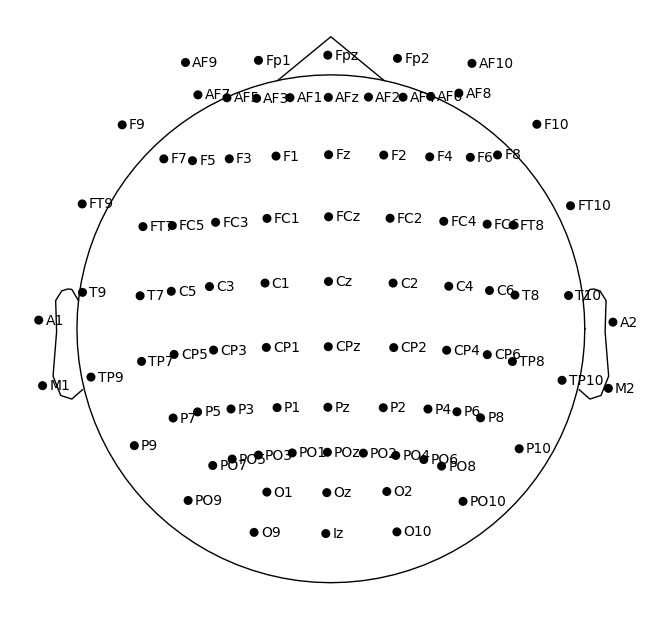

In [64]:
mne.channels.make_standard_montage("standard_1020").plot()

In [69]:
[channel.split("-")[0] for channel in raw.info["ch_names"]]

['FP1',
 'F7',
 'T7',
 'P7',
 'FP1',
 'F3',
 'C3',
 'P3',
 'FP2',
 'F4',
 'C4',
 'P4',
 'FP2',
 'F8',
 'P8',
 'FZ',
 'CZ',
 'P7',
 'T7',
 'FT9',
 'FT10']

In [67]:
anodes = [channel.split("-")[0] for channel in raw.info["ch_names"]]
cathodes = [channel.split("-")[1] for channel in raw.info["ch_names"]]
mne.set_bipolar_reference(raw, anode=anodes, cathode=cathodes)

ValueError: There is already a channel named "FP1-F7", please specify a different name for the bipolar channel using the ch_name parameter.

In [68]:
raw.rename_channels(lambda ch_name: ch_name.split("-")[0])

ValueError: New channel names are not unique, renaming failed

In [35]:
mapping = {
    'FP1-F7': 'AF7',
    'F7-T7': 'FT7',
    'T7-P7': 'TP7',
    'P7-O1': 'PO7',
    'FP1-F3': 'AF3',
    'F3-C3': 'FC3',
    'C3-P3': 'CP3',
    'P3-O1': 'PO3',
    'FP2-F4': 'AF4',
    'F4-C4': 'FC4',
    'C4-P4': 'CP4',
    'P4-O2': 'PO4',
    'FP2-F8': 'AF8',
    'F8-T8': 'FT8',
    'T8-P8-0': 'TP8',
    'P8-O2': 'PO8',
    'FZ-CZ': 'FCz',
    'CZ-PZ': 'CPz',
    'P7-T7': 'TP7',
    'T7-FT9': '???',
    'FT9-FT10': '???',
    'FT10-T8': '???',
    'T8-P8-1': 'TP8'
}

('FP', '1', 'F', '7')
('F', '7', 'T', '7')
('T', '7', 'P', '7')
('P', '7', 'O', '1')
('FP', '1', 'F', '3')
('F', '3', 'C', '3')
('C', '3', 'P', '3')
('P', '3', 'O', '1')
('FP', '2', 'F', '4')
('F', '4', 'C', '4')
('C', '4', 'P', '4')
('P', '4', 'O', '2')
('FP', '2', 'F', '8')
('F', '8', 'T', '8')
('T', '8', 'P', '8')
('P', '8', 'O', '2')
('FZ', '', 'CZ', '')
('CZ', '', 'PZ', '')
('P', '7', 'T', '7')
('T', '7', 'FT', '9')
('FT', '9', 'FT', '10')
('FT', '10', 'T', '8')
('T', '8', 'P', '8')


{'FP1-F7': 'FP1',
 'F7-T7': 'F7',
 'T7-P7': 'T7',
 'P7-O1': 'P7',
 'FP1-F3': 'FP1',
 'F3-C3': 'F3',
 'C3-P3': 'C3',
 'P3-O1': 'P3',
 'FP2-F4': 'FP2',
 'F4-C4': 'F4',
 'C4-P4': 'C4',
 'P4-O2': 'P4',
 'FP2-F8': 'FP2',
 'F8-T8': 'F8',
 'T8-P8-0': 'T8',
 'P8-O2': 'P8',
 'FZ-CZ': 'FZ',
 'CZ-PZ': 'CZ',
 'P7-T7': 'P7',
 'T7-FT9': 'T7',
 'FT9-FT10': 'FT9',
 'FT10-T8': 'FT10',
 'T8-P8-1': 'T8'}

In [73]:
raw.set_montage("standard_1020", match_case=False, on_missing="warn")

/tmp/ipykernel_4364/2381065304.py:1: RuntimeWarning: DigMontage is only a subset of info. There are 21 channel positions not present in the DigMontage. The channels missing from the montage are:

['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw.set_montage("standard_1020", match_case=False, on_missing="warn")


Measurement date,"November 06, 2076 14:43:12 GMT"
Experimenter,Unknown
Participant,Surrogate
Digitized points,3 points
Good channels,21 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,0.00 Hz
Lowpass,128.00 Hz


In [84]:
sampling_freq = 100

times = np.linspace(0, 1, sampling_freq, endpoint=False)
sine = np.sin(20 * np.pi * times)
cosine = np.cos(10 * np.pi * times)
data = np.array([sine, cosine])

info = mne.create_info(
    ch_names=["10 Hz sine", "5 Hz cosine"], ch_types=["misc"] * 2, sfreq=sampling_freq
)

test_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=2, n_times=100
    Range : 0 ... 99 =      0.000 ...     0.990 secs
Ready.


In [100]:
x, y = raw["C3-P3"]
print(x[0])
print(y)

[-1.54334554e-05  1.95360195e-07  1.95360195e-07 ...  5.86080586e-07
 -1.75824176e-06  3.32112332e-06]
[0.00000000e+00 3.90625000e-03 7.81250000e-03 ... 3.59998828e+03
 3.59999219e+03 3.59999609e+03]


In [96]:
x = 3.59999609e+03

In [95]:
x, y = test_raw["10 Hz sine"]
print(x)
print(y)

[[ 0.00000000e+00  5.87785252e-01  9.51056516e-01  9.51056516e-01
   5.87785252e-01  1.22464680e-16 -5.87785252e-01 -9.51056516e-01
  -9.51056516e-01 -5.87785252e-01 -2.44929360e-16  5.87785252e-01
   9.51056516e-01  9.51056516e-01  5.87785252e-01  3.67394040e-16
  -5.87785252e-01 -9.51056516e-01 -9.51056516e-01 -5.87785252e-01
  -4.89858720e-16  5.87785252e-01  9.51056516e-01  9.51056516e-01
   5.87785252e-01  6.12323400e-16 -5.87785252e-01 -9.51056516e-01
  -9.51056516e-01 -5.87785252e-01 -7.34788079e-16  5.87785252e-01
   9.51056516e-01  9.51056516e-01  5.87785252e-01 -2.69546092e-15
  -5.87785252e-01 -9.51056516e-01 -9.51056516e-01 -5.87785252e-01
  -9.79717439e-16  5.87785252e-01  9.51056516e-01  9.51056516e-01
   5.87785252e-01  1.10218212e-15 -5.87785252e-01 -9.51056516e-01
  -9.51056516e-01 -5.87785252e-01 -1.22464680e-15  5.87785252e-01
   9.51056516e-01  9.51056516e-01  5.87785252e-01 -2.20560220e-15
  -5.87785252e-01 -9.51056516e-01 -9.51056516e-01 -5.87785252e-01
  -1.46957

In [75]:
raw.plot_sensors()

RuntimeError: No valid channel positions found

In [12]:
x = mne.make_fixed_length_epochs(raw, 7)

Not setting metadata
514 matching events found
No baseline correction applied
0 projection items activated


In [13]:
print(raw.get_data().shape)

(23, 921600)


In [15]:
raw.plot_sensors()

RuntimeError: No valid channel positions found

In [14]:
print(x.get_data().shape)

Loading data for 514 events and 1792 original time points ...
0 bad epochs dropped
(514, 23, 1792)
